# Writing datasets to HDF5 databases

Uses the data that was converted to right format and moved to right folders in the previous notebook.

**Pipeline**:
1. Add mirror padding to images and corresponding masks
2. Patch images and corresponding masks to arrays of patches. Each patch is 'patch_size'x'patch_size' (config.py).
3. Do rigid augmentations to some of the patches (augmentations.py)
4. Crop patches to final network 'input_size' (config.py)
5. save patches to .pytable (hdf5) file

**Note**: If dataset is **pannuke** no patching, augmenting or cropping is done. (Augmentations maybe in the future)


In [1]:
from omegaconf import OmegaConf 
from src.conf.conf_schema import Schema
from src.conf.config import CONFIG
from src.utils.data_writer import PatchWriter, visualize_db_patches

In [2]:
config = CONFIG

# Kumar

In [3]:
config.dataset_args.dataset = "kumar"
writer_kumar = PatchWriter.from_conf(config)

In [4]:
writer_kumar.write_dbs()

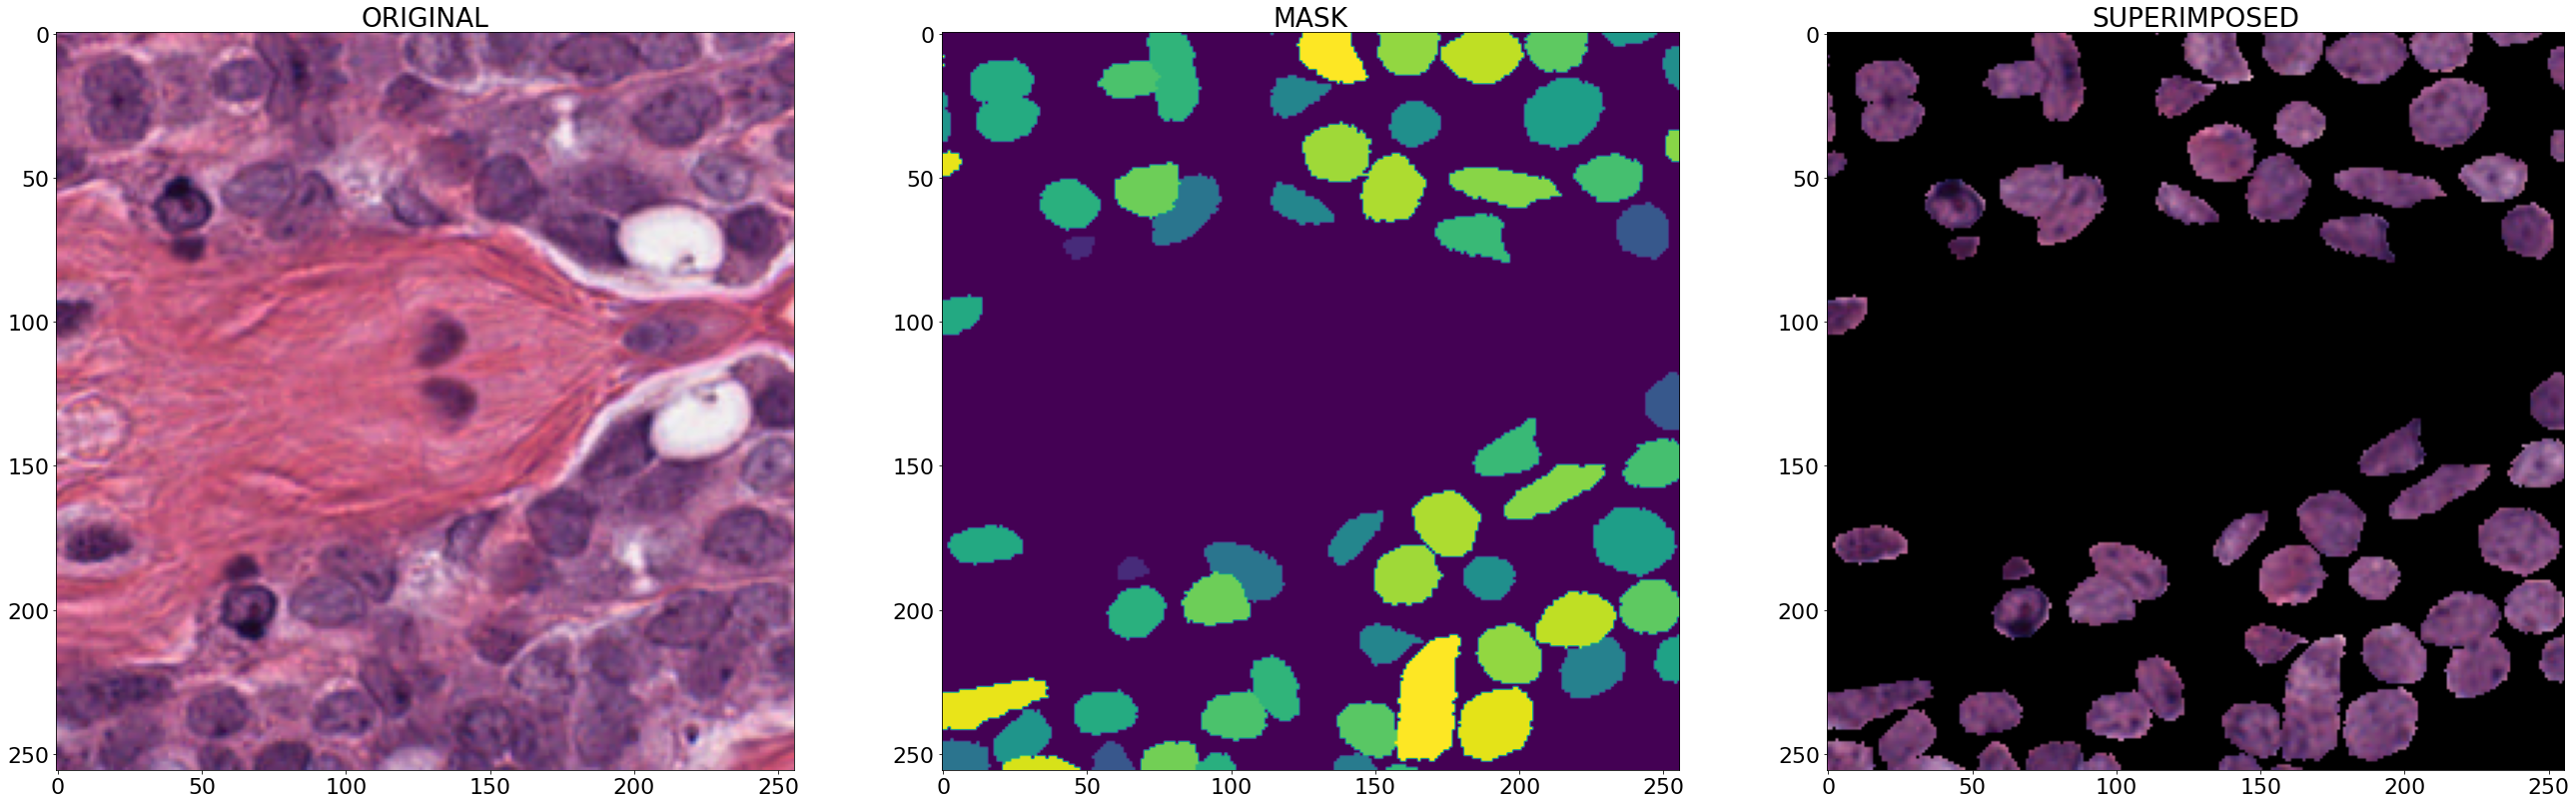

array([  0,  53, 117, 118, 165, 167, 178, 189, 195, 197, 212, 214, 224,
       228, 241, 247, 260, 264, 270, 273, 280, 287, 290, 302, 308, 319,
       323, 334, 337, 352, 353, 360, 368, 377, 388, 403, 412, 414, 429],
      dtype=int16)

In [6]:
# Visualize masks and image patches for checking correctness of db
files = [file for file in writer_kumar.database_dir.iterdir()]
visualize_db_patches(files[1].as_posix(), index=14)

# check an example on how the patches look for a single image
# writer_kumar.viz_patches_example(index=3, img_type="overlay", phase="test")

# Consep

In [7]:
config.dataset_args.dataset = "consep"
writer_consep = PatchWriter.from_conf(config)

In [8]:
writer_consep.write_dbs()

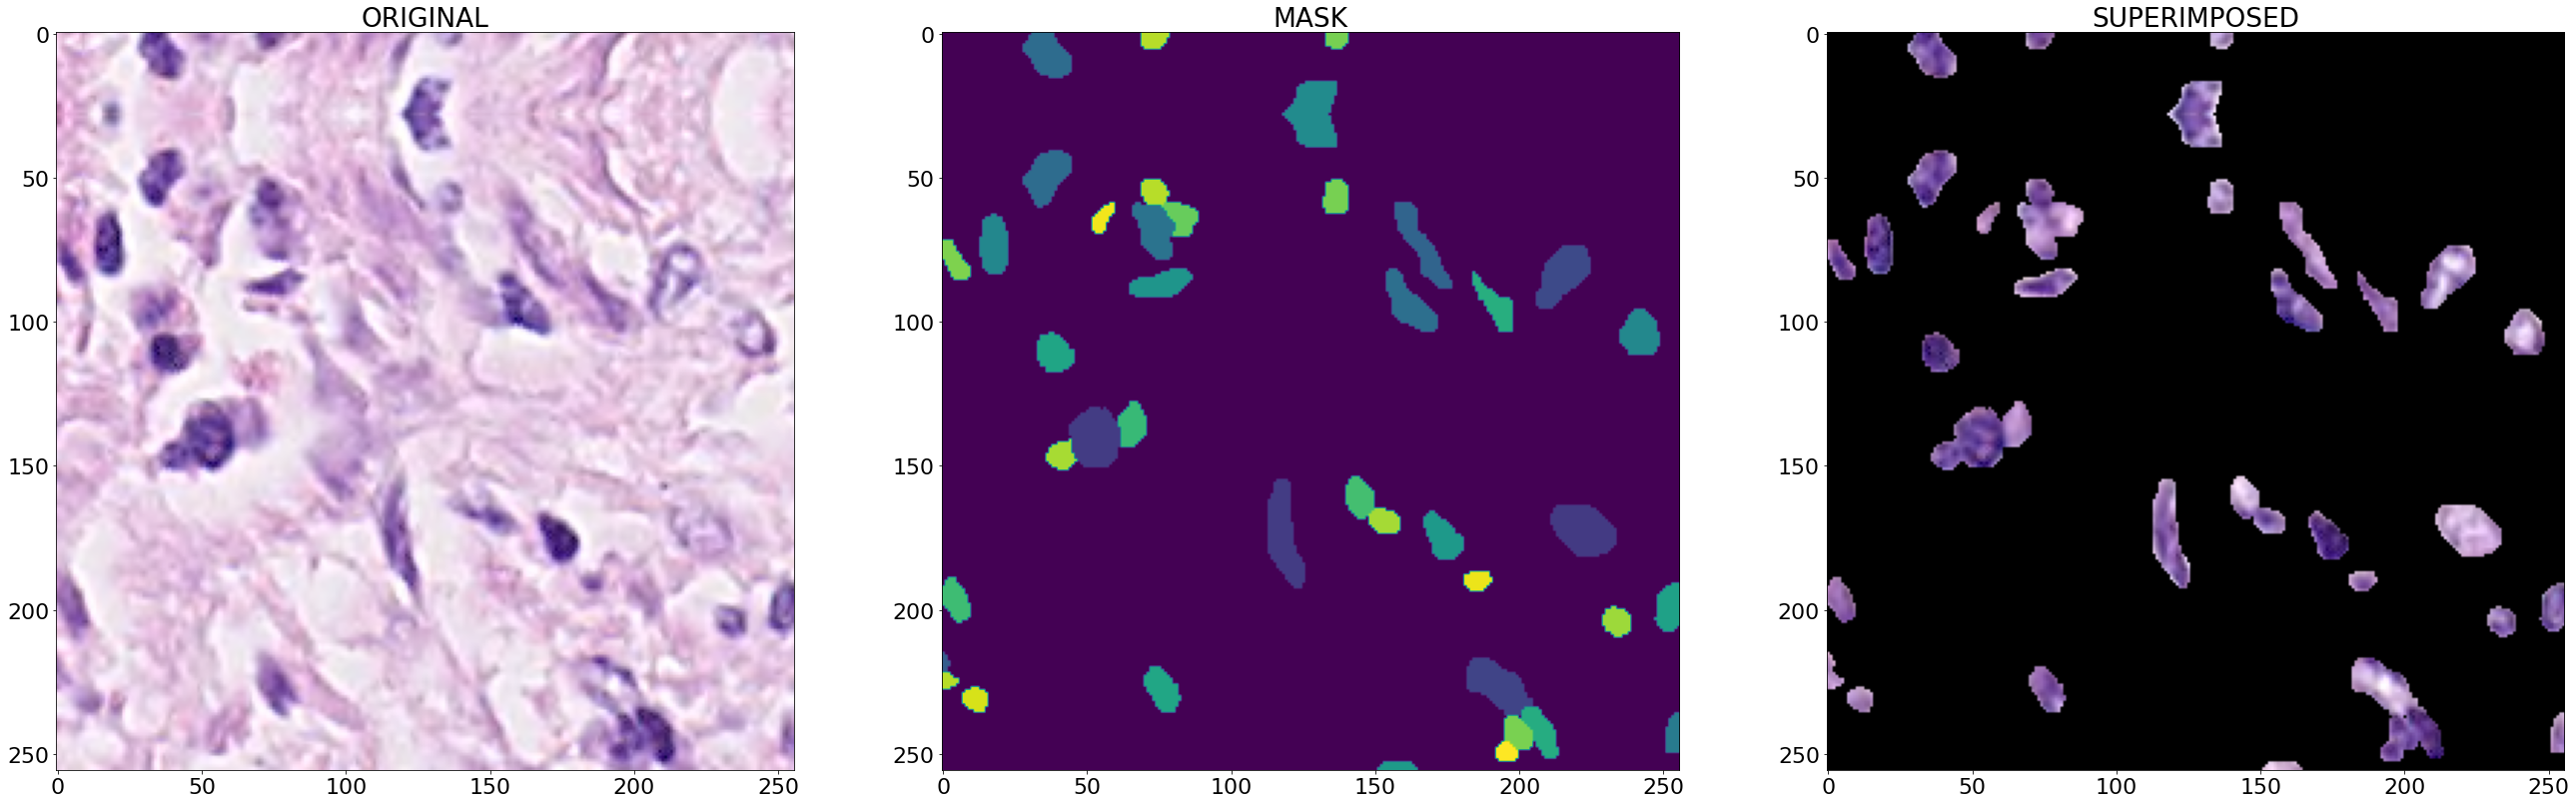

array([  0, 140, 146, 147, 170, 186, 243, 266, 290, 301, 313, 344, 381,
       386, 398, 431, 443, 450, 473, 485, 488, 510, 517, 556, 569, 578,
       632, 655, 657, 665, 703, 712, 717, 735, 737, 775, 800, 806, 824],
      dtype=int16)

In [11]:
# Visualize masks and image patches for checking correctness
files = [file for file in writer_consep.database_dir.iterdir()]
visualize_db_patches(files[0].as_posix(), index=10)
# writer_consep.viz_patches_example(index=3, img_type="mask", phase="train")

# Pannuke

- May take a couple mins

In [12]:
config.dataset_args.dataset = "pannuke"
config.patching_args.patch_size = 256
writer_pannuke = PatchWriter.from_conf(config)

In [13]:
writer_pannuke.write_dbs()

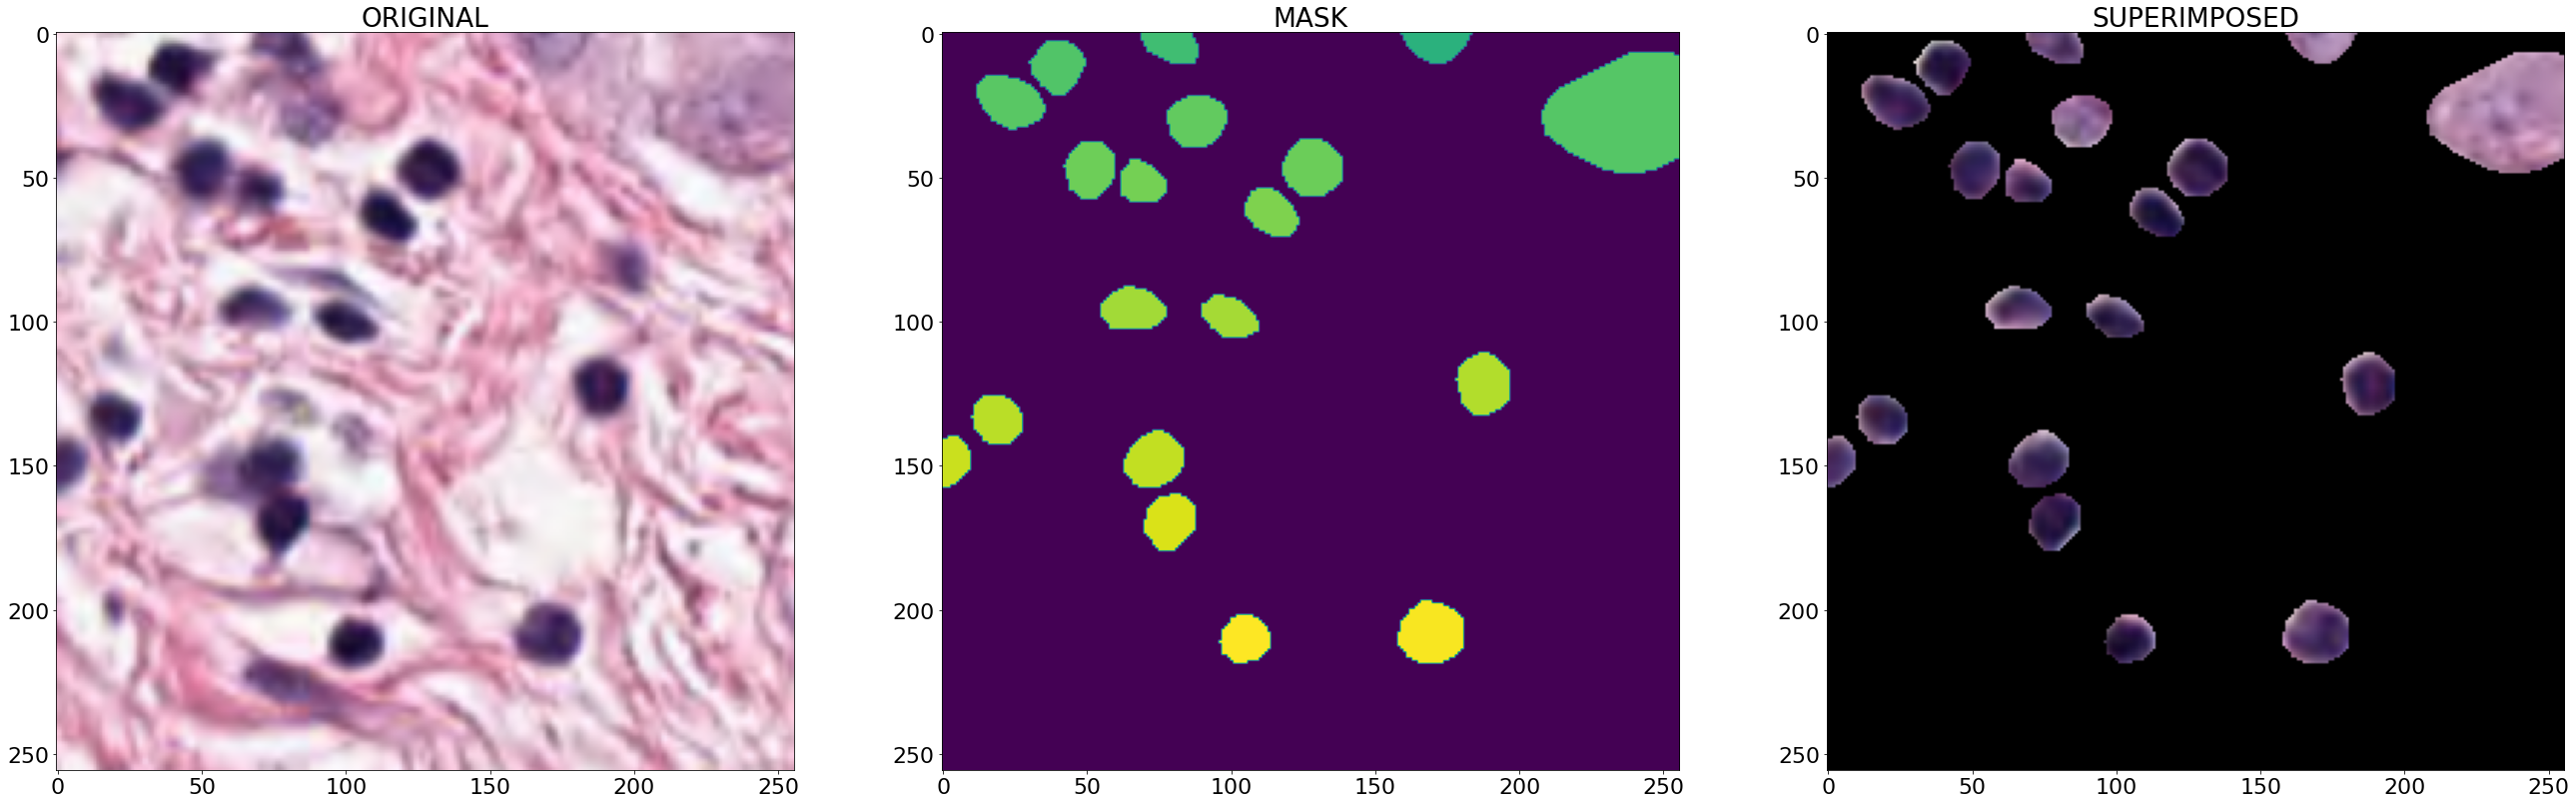

array([  0, 128, 139, 146, 147, 149, 152, 155, 156, 158, 161, 172, 173,
       177, 179, 182, 184, 189, 198, 200], dtype=int16)

In [15]:
files = [file for file in writer_pannuke.database_dir.iterdir()]
visualize_db_patches(files[1].as_posix(), index=921)
# writer_pannuke.viz_patches_example(index=3, img_type="img", phase="test")